**Project Title:**
**Marketing Campaign for Banking Products**


*The bank has a growing customer base. The bank wants to increase customers base to bring in more loan business and earn more through the interest on loans. So , the bank wants to convert the liability based customers to personal loan customers. A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. The department wants you to build a model that will help them identify the potential customers who have a higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.*

In [131]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
import io
from sklearn import datasets 
from sklearn import metrics 
from sklearn.tree import DecisionTreeClassifier 
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import statsmodels.api as sm
from sklearn import naive_bayes
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier



In [132]:
from google.colab import files
uploaded = files.upload()




Saving Bank_Personal_Loan_Modelling.csv to Bank_Personal_Loan_Modelling (3).csv


In [133]:
df_val = pd.read_csv(io.BytesIO(uploaded['Bank_Personal_Loan_Modelling.csv']))
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**Column descriptions:**

#	Data Description:																
#	ID:	Customer ID							
#	Age:	Customer's age in completed years							
#	Experience: years of professional experience							
#	Income:	Annual income of the customer 							
#	ZIPCode:	Home Address ZIP code.							
#	Family:	Family size of the customer							
#	CCAvg	Avg: spending on credit cards per month 							
#	Education:	Education Level. 
#	Mortgage:	Value of house mortgage if any.					
#	Personal Loan:	Did this customer accept the personal loan offered in the last campaign?							
#	Securities Account:	Does the customer have a securities account with the bank				
#	CD Account:	Does the customer have a certificate of deposit (CD) account with the bank?							
##Online Facility: 	Does the customer use internet banking facilities?				
##CreditCard: 	Does the customer use a credit card issued by UniversalBank?

**Applying All the Functions to Datasets**


In [134]:
#Describing the Datasets
df_val.describe()

ID          Age  ...       Online   CreditCard
count  5000.000000  5000.000000  ...  5000.000000  5000.000000
mean   2500.500000    45.338400  ...     0.596800     0.294000
std    1443.520003    11.463166  ...     0.490589     0.455637
min       1.000000    23.000000  ...     0.000000     0.000000
25%    1250.750000    35.000000  ...     0.000000     0.000000
50%    2500.500000    45.000000  ...     1.000000     0.000000
75%    3750.250000    55.000000  ...     1.000000     1.000000
max    5000.000000    67.000000  ...     1.000000     1.000000

[8 rows x 14 columns]

In [135]:
df_val.isnull().tail()

ID    Age  Experience  ...  CD Account  Online  CreditCard
4995  False  False       False  ...       False   False       False
4996  False  False       False  ...       False   False       False
4997  False  False       False  ...       False   False       False
4998  False  False       False  ...       False   False       False
4999  False  False       False  ...       False   False       False

[5 rows x 14 columns]

In [136]:
df_val.isnull().head()

ID    Age  Experience  ...  CD Account  Online  CreditCard
0  False  False       False  ...       False   False       False
1  False  False       False  ...       False   False       False
2  False  False       False  ...       False   False       False
3  False  False       False  ...       False   False       False
4  False  False       False  ...       False   False       False

[5 rows x 14 columns]

In [137]:
df_val.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [138]:
df_val.isnull().sum()                               # Checking for any null values present in the dataset

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [139]:
df_val.shape           #finding the shape of the datasets

(5000, 14)

In [140]:
df_val.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [141]:
#finding all dublicates values
df_val.duplicated

<bound method DataFrame.duplicated of         ID  Age  Experience  ...  CD Account  Online  CreditCard
0        1   25           1  ...           0       0           0
1        2   45          19  ...           0       0           0
2        3   39          15  ...           0       0           0
3        4   35           9  ...           0       0           0
4        5   35           8  ...           0       0           1
...    ...  ...         ...  ...         ...     ...         ...
4995  4996   29           3  ...           0       1           0
4996  4997   30           4  ...           0       1           0
4997  4998   63          39  ...           0       0           0
4998  4999   65          40  ...           0       1           0
4999  5000   28           4  ...           0       1           1

[5000 rows x 14 columns]>

In [142]:
df_val.dropna().head()

ID  Age  Experience  ...  CD Account  Online  CreditCard
0   1   25           1  ...           0       0           0
1   2   45          19  ...           0       0           0
2   3   39          15  ...           0       0           0
3   4   35           9  ...           0       0           0
4   5   35           8  ...           0       0           1

[5 rows x 14 columns]

In [143]:
df_val.dropna().tail()

ID  Age  Experience  ...  CD Account  Online  CreditCard
4995  4996   29           3  ...           0       1           0
4996  4997   30           4  ...           0       1           0
4997  4998   63          39  ...           0       0           0
4998  4999   65          40  ...           0       1           0
4999  5000   28           4  ...           0       1           1

[5 rows x 14 columns]

In [144]:
#List unique values in the train_df column
df_val.Age.unique()

array([25, 45, 39, 35, 37, 53, 50, 34, 65, 29, 48, 59, 67, 60, 38, 42, 46,
       55, 56, 57, 44, 36, 43, 40, 30, 31, 51, 32, 61, 41, 28, 49, 47, 62,
       58, 54, 33, 27, 66, 24, 52, 26, 64, 63, 23])

# **perform various statistical tests on train_df datasets**

In [145]:
df_val.min()                    # lowest value in each column of the datasets

ID                       1.0
Age                     23.0
Experience              -3.0
Income                   8.0
ZIP Code              9307.0
Family                   1.0
CCAvg                    0.0
Education                1.0
Mortgage                 0.0
Personal Loan            0.0
Securities Account       0.0
CD Account               0.0
Online                   0.0
CreditCard               0.0
dtype: float64

In [146]:
df_val.median()                       #finding median each column of the datasets

ID                     2500.5
Age                      45.0
Experience               20.0
Income                   64.0
ZIP Code              93437.0
Family                    2.0
CCAvg                     1.5
Education                 2.0
Mortgage                  0.0
Personal Loan             0.0
Securities Account        0.0
CD Account                0.0
Online                    1.0
CreditCard                0.0
dtype: float64

In [147]:
df_val.std()                               #finding the standard deviation of each column

ID                    1443.520003
Age                     11.463166
Experience              11.467954
Income                  46.033729
ZIP Code              2121.852197
Family                   1.147663
CCAvg                    1.747659
Education                0.839869
Mortgage               101.713802
Personal Loan            0.294621
Securities Account       0.305809
CD Account               0.238250
Online                   0.490589
CreditCard               0.455637
dtype: float64

**EDA: Study the data distribution in each attribute and target variable,share your findings**


In [148]:
df_val['Age'].unique()                              # Count unique values in column 'Age' of the dataframe

array([25, 45, 39, 35, 37, 53, 50, 34, 65, 29, 48, 59, 67, 60, 38, 42, 46,
       55, 56, 57, 44, 36, 43, 40, 30, 31, 51, 32, 61, 41, 28, 49, 47, 62,
       58, 54, 33, 27, 66, 24, 52, 26, 64, 63, 23])

In [149]:
df_val['Income'].unique()                            # Count unique values in column 'Income' of the dataframe

array([ 49,  34,  11, 100,  45,  29,  72,  22,  81, 180, 105, 114,  40,
       112, 130, 193,  21,  25,  63,  62,  43, 152,  83, 158,  48, 119,
        35,  41,  18,  50, 121,  71, 141,  80,  84,  60, 132, 104,  52,
       194,   8, 131, 190,  44, 139,  93, 188,  39, 125,  32,  20, 115,
        69,  85, 135,  12, 133,  19,  82, 109,  42,  78,  51, 113, 118,
        64, 161,  94,  15,  74,  30,  38,   9,  92,  61,  73,  70, 149,
        98, 128,  31,  58,  54, 124, 163,  24,  79, 134,  23,  13, 138,
       171, 168,  65,  10, 148, 159, 169, 144, 165,  59,  68,  91, 172,
        55, 155,  53,  89,  28,  75, 170, 120,  99, 111,  33, 129, 122,
       150, 195, 110, 101, 191, 140, 153, 173, 174,  90, 179, 145, 200,
       183, 182,  88, 160, 205, 164,  14, 175, 103, 108, 185, 204, 154,
       102, 192, 202, 162, 142,  95, 184, 181, 143, 123, 178, 198, 201,
       203, 189, 151, 199, 224, 218])

In [150]:
df_val['Family'].unique()                  # Count unique values in column 'family' of the dataframe           

array([4, 3, 1, 2])

In [151]:
df_val.nunique(dropna=False)                  # Count unique elements in each column including NaN

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [152]:
df_val.nunique()          #finding unique value in each columns

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [153]:
df_val.drop('ID',axis=1)

Age  Experience  Income  ...  CD Account  Online  CreditCard
0      25           1      49  ...           0       0           0
1      45          19      34  ...           0       0           0
2      39          15      11  ...           0       0           0
3      35           9     100  ...           0       0           0
4      35           8      45  ...           0       0           1
...   ...         ...     ...  ...         ...     ...         ...
4995   29           3      40  ...           0       1           0
4996   30           4      15  ...           0       1           0
4997   63          39      24  ...           0       0           0
4998   65          40      49  ...           0       1           0
4999   28           4      83  ...           0       1           1

[5000 rows x 13 columns]

In [154]:
df_val.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [155]:
experience = df_val['Experience']
age = df_val['Age']
correlation = experience.corr(age)
correlation

0.9942148569683321

In [156]:
(df_val.Mortgage==0).sum()

3462

In [157]:
df_val.Education.value_counts()                              # Value counts for education

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [158]:
df_val.Family.value_counts()                 # Value counts for Family

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [159]:
(df_val.CCAvg==0).sum()

106

In [160]:
duplicate_rows_df = df_val[df_val.duplicated()]
print("Number of duplicate rows ", duplicate_rows_df)

Number of duplicate rows  Empty DataFrame
Columns: [ID, Age, Experience, Income, ZIP Code, Family, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard]
Index: []


In [161]:
df_val['Experience'] = df_val['Experience'].abs()

df_val.describe().transpose()

count          mean  ...       75%      max
ID                  5000.0   2500.500000  ...   3750.25   5000.0
Age                 5000.0     45.338400  ...     55.00     67.0
Experience          5000.0     20.134600  ...     30.00     43.0
Income              5000.0     73.774200  ...     98.00    224.0
ZIP Code            5000.0  93152.503000  ...  94608.00  96651.0
Family              5000.0      2.396400  ...      3.00      4.0
CCAvg               5000.0      1.937938  ...      2.50     10.0
Education           5000.0      1.881000  ...      3.00      3.0
Mortgage            5000.0     56.498800  ...    101.00    635.0
Personal Loan       5000.0      0.096000  ...      0.00      1.0
Securities Account  5000.0      0.104400  ...      0.00      1.0
CD Account          5000.0      0.060400  ...      0.00      1.0
Online              5000.0      0.596800  ...      1.00      1.0
CreditCard          5000.0      0.294000  ...      1.00      1.0

[14 rows x 8 columns]

**Encode categorical features as an integer array**

In [162]:
enc = OrdinalEncoder()
enc.fit_transform(df_val[['Income']])

array([[33.],
       [22.],
       [ 3.],
       ...,
       [14.],
       [33.],
       [61.]])

**VISUALIZING UNIVARIATE AND BIVARIATES**

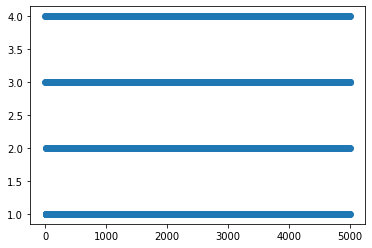

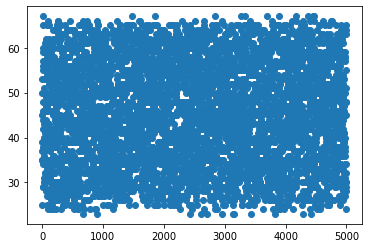

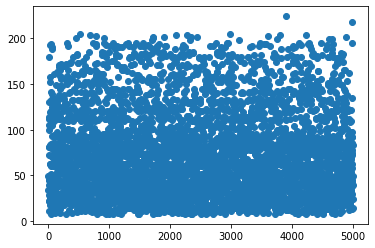

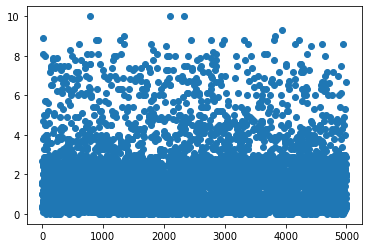

In [163]:
plt.scatter(df_val.index,df_val['Family'])
plt.show()
plt.scatter(df_val.index,df_val['Age'])
plt.show()
plt.scatter(df_val.index,df_val['Income'])
plt.show()
plt.scatter(df_val.index,df_val['CCAvg'])
plt.show()

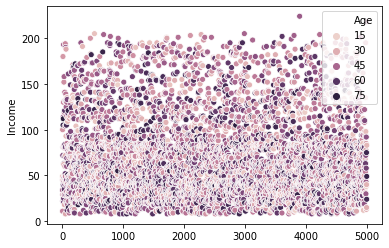

In [164]:
sns.scatterplot(x=df_val.index,y=df_val['Income'],hue=df_val['Age'])


No handles with labels found to put in legend.


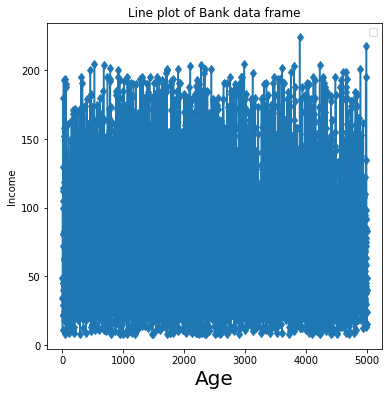

In [165]:
plt.figure(figsize=(6,6))
plt.title('Line plot of Bank data frame')
plt.xlabel('Age',fontsize=20)
plt.ylabel('Income',fontsize=10)
plt.plot(df_val.index,df_val['Income'],markevery=1,marker='d')     
plt.legend()
plt.show()

Text(0.5, 0, 'CCAvg')

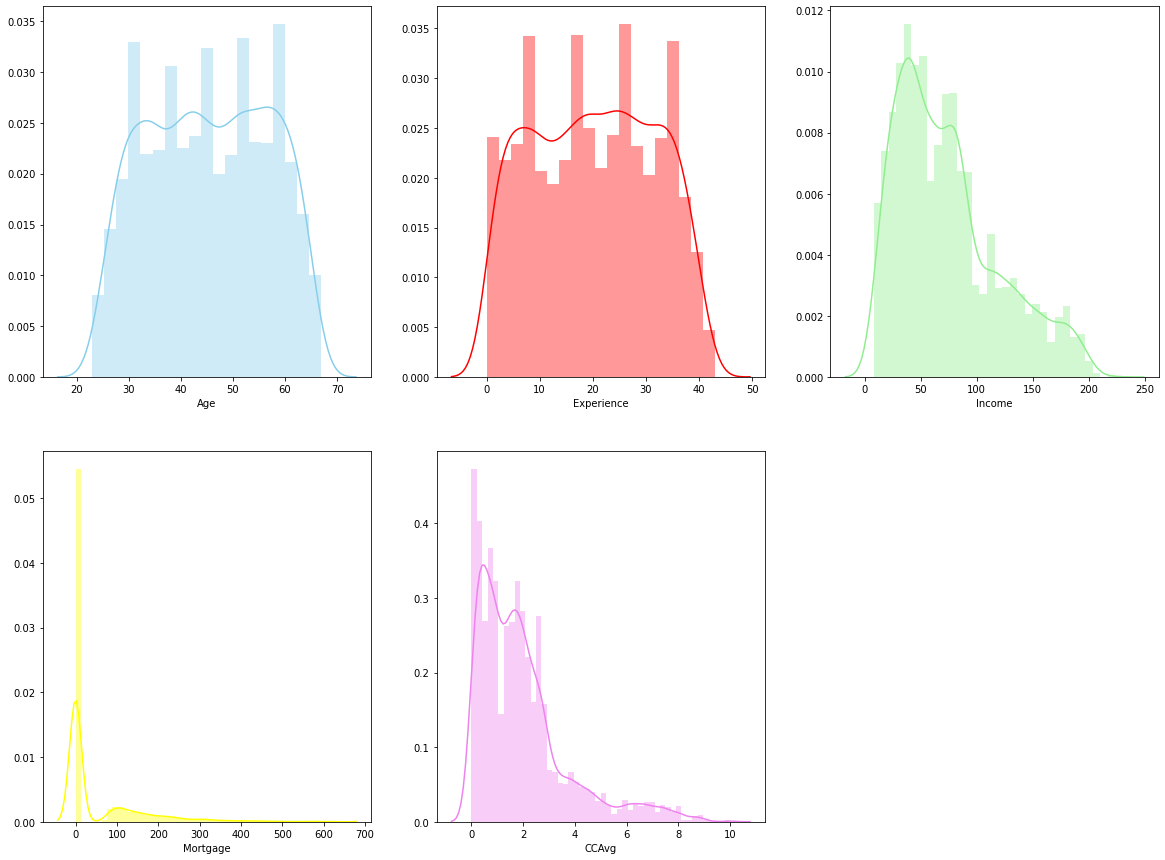

In [166]:
plt.figure(figsize= (20,15))
plt.subplot(2,3,1)
sns.distplot(df_val.Age, color='skyblue')
plt.xlabel('Age')

plt.subplot(2,3,2)
sns.distplot(df_val.Experience, color='red')
plt.xlabel('Experience')

plt.subplot(2,3,3)
sns.distplot(df_val.Income, color='lightgreen')
plt.xlabel('Income')

plt.subplot(2,3,4)
sns.distplot(df_val.Mortgage, color='yellow')
plt.xlabel('Mortgage')

plt.subplot(2,3,5)
sns.distplot(df_val.CCAvg, color='violet')
plt.xlabel('CCAvg')

Text(0.5, 0, 'CCAvg')

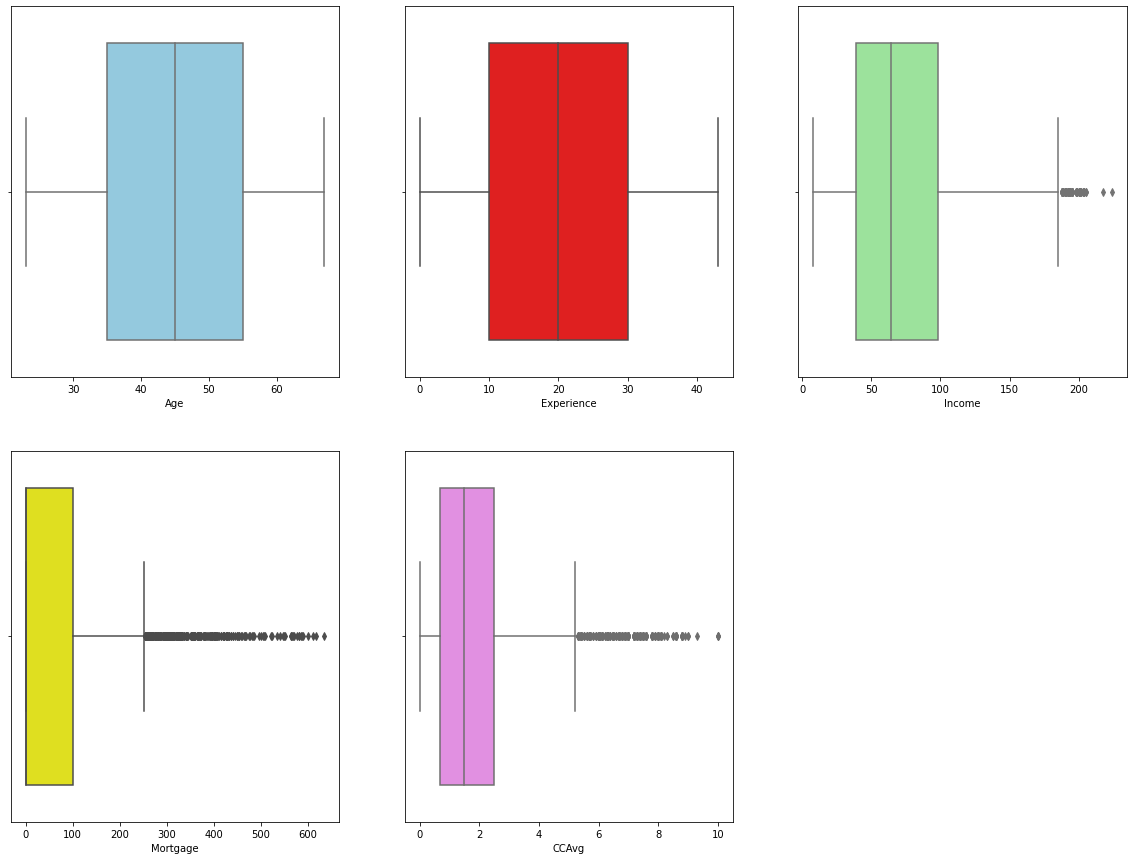

In [167]:
plt.figure(figsize= (20,15))             #subplot and boxplot
plt.subplot(2,3,1)
sns.boxplot(df_val.Age, color='skyblue')
plt.xlabel('Age')

plt.subplot(2,3,2)
sns.boxplot(df_val.Experience, color='red')       
plt.xlabel('Experience')

plt.subplot(2,3,3)
sns.boxplot(df_val.Income, color='lightgreen')
plt.xlabel('Income')

plt.subplot(2,3,4)
sns.boxplot(df_val.Mortgage, color='yellow')
plt.xlabel('Mortgage')

plt.subplot(2,3,5)
sns.boxplot(df_val.CCAvg, color='violet')
plt.xlabel('CCAvg')

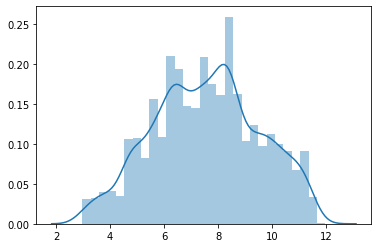

In [168]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(df_val['Income'].values.reshape(-1,1))
temp=pt.transform(df_val["Income"].values.reshape(-1,1))
sns.distplot(temp)


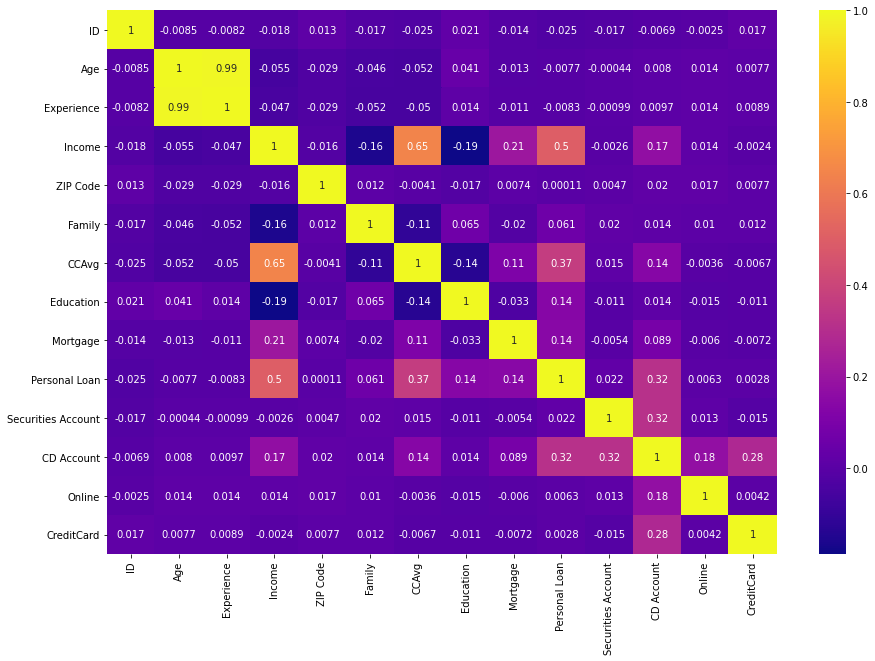

In [169]:
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(df_val.corr(),cmap='plasma',annot=True);

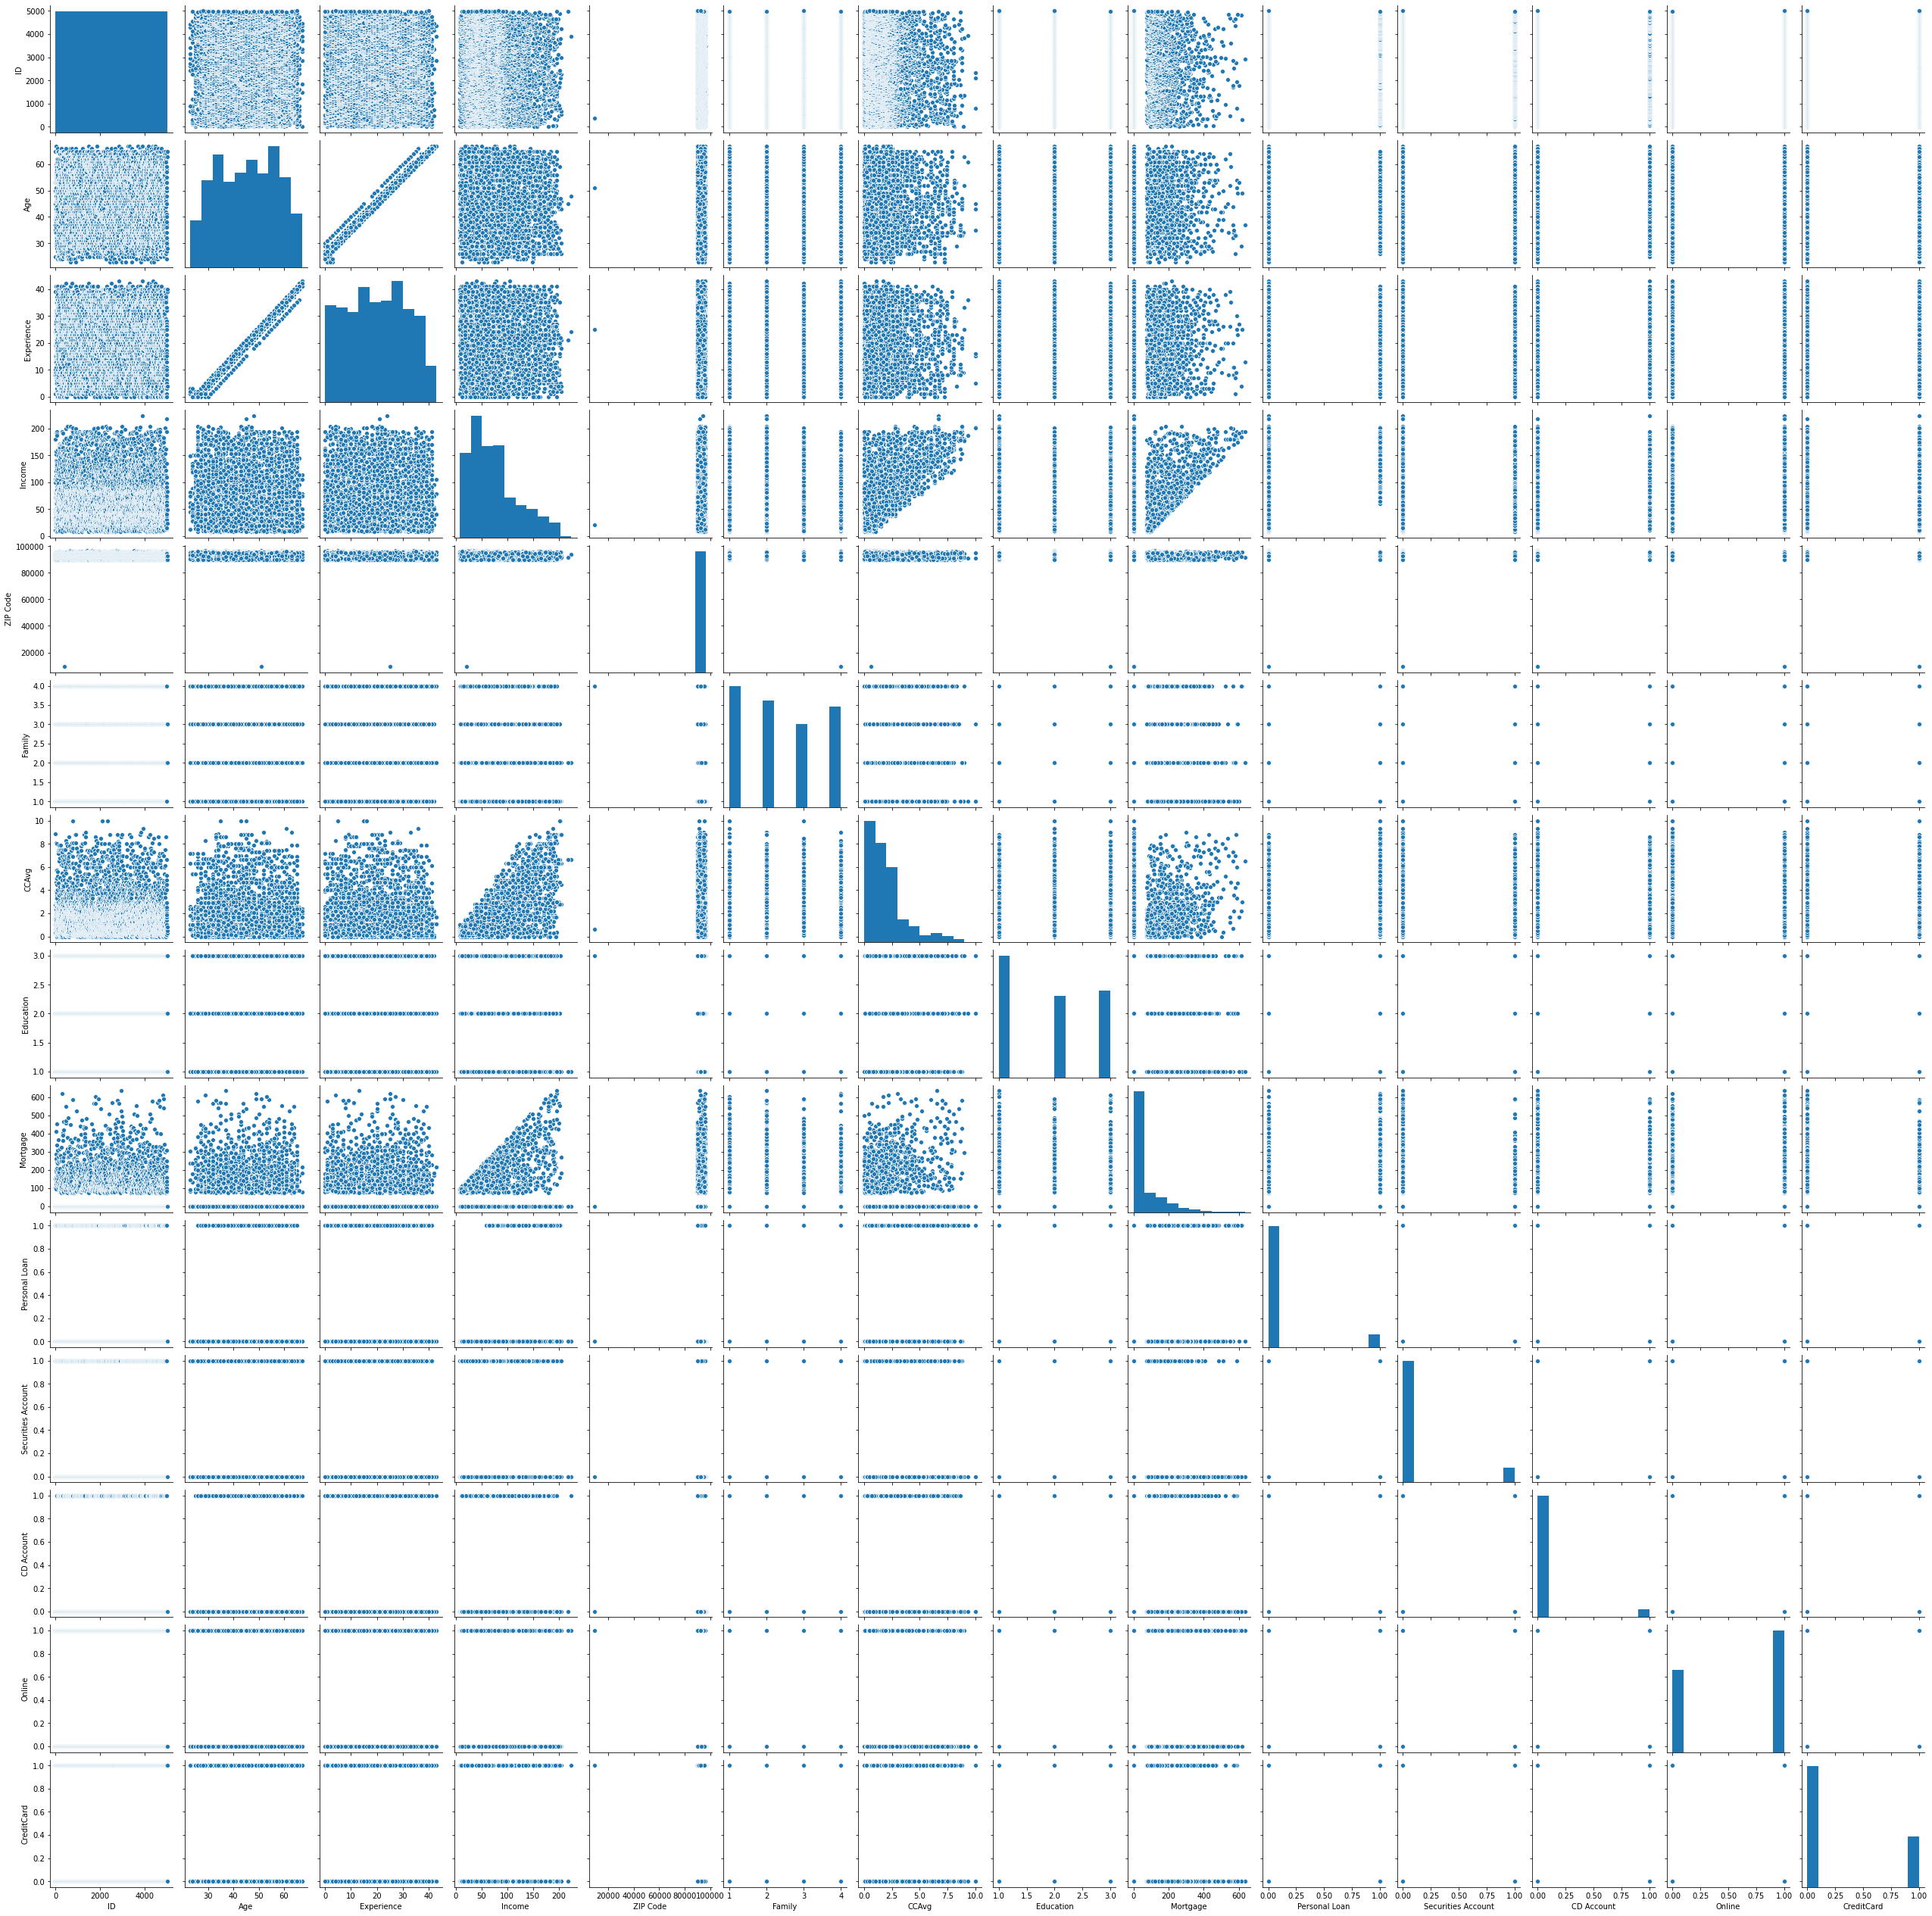

In [170]:
sns.pairplot(df_val)


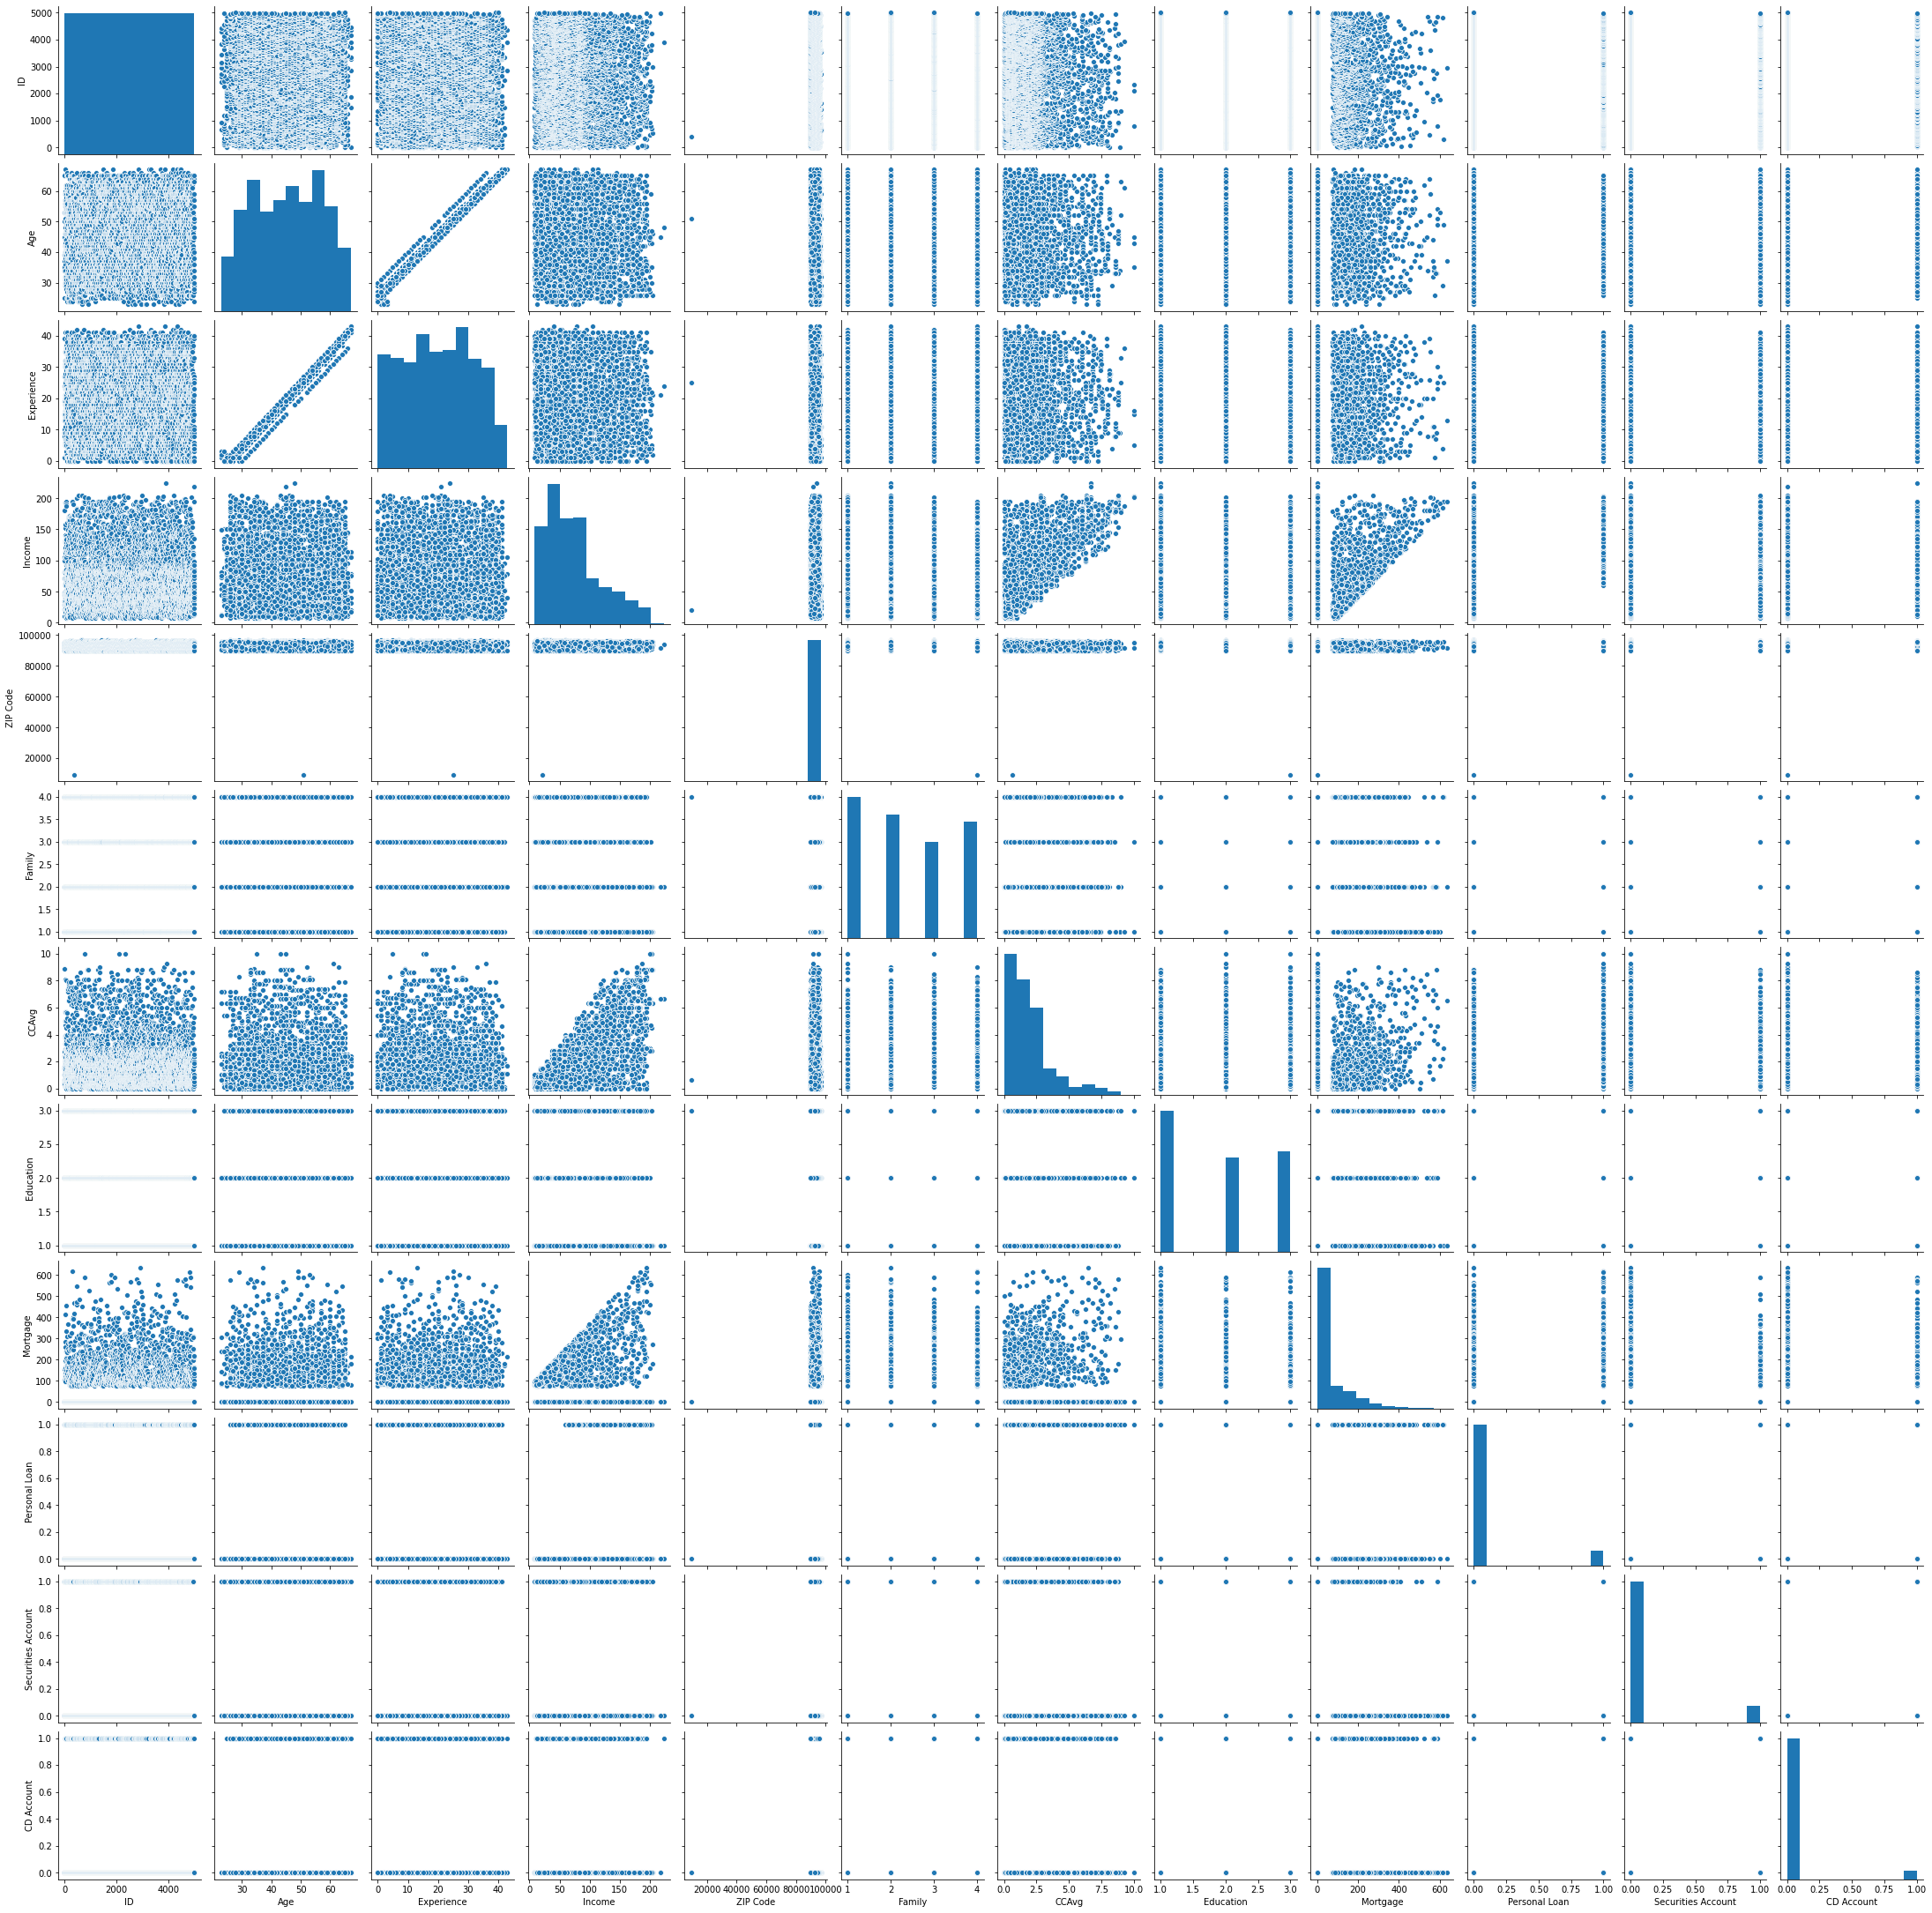

In [171]:
#importing seaborn for statistical plots
import seaborn as sns
df_attr = df_val.iloc[:,0:12] #compare all attributes visually to check for relationships that can be exploited

sns.pairplot(df_attr)

In [172]:
df_val.groupby(["Personal Loan"]).count()  #The data set is skewed in terms of target column.
# There are far few records in class 1 i.e. people who took the personal loan last time. But that 
# is the class of interst to us! We have to identify potential customers and do not want any potential
# customer to be missed.

ID   Age  Experience  ...  CD Account  Online  CreditCard
Personal Loan                          ...                                
0              4520  4520        4520  ...        4520    4520        4520
1               480   480         480  ...         480     480         480

[2 rows x 13 columns]

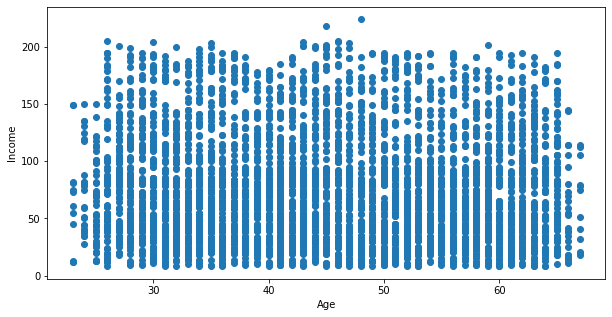

In [173]:
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(df_val['Age'],df_val['Income'])
ax.set_xlabel('Age')
ax.set_ylabel('Income')
plt.show()

**There are some outliers in some of the numeric variables as can be seen above. May need outlier treatment**

In [174]:
# Dealing with the negative values in the Experience variable
df_val[df_val.Experience<0].Experience.value_counts()

Series([], Name: Experience, dtype: int64)

**Strong correlation between Age and Experience. Family looks like categorical variable. Income and CCAvg also seem to have a fairly strong positive correlation as can be seen below**

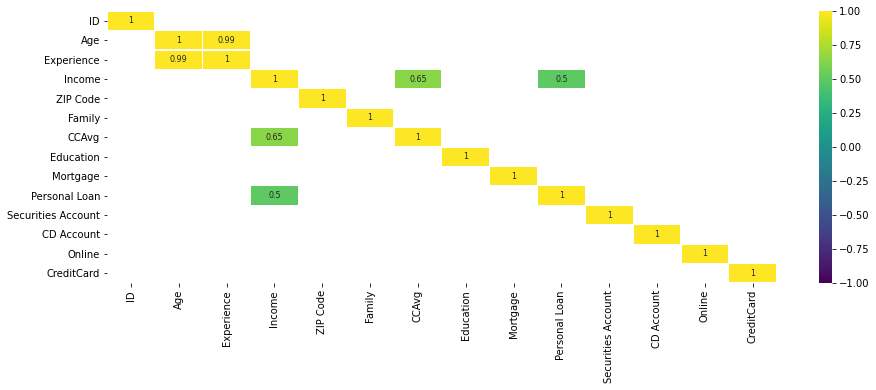

In [175]:
corr=df_val.corr()
plt.figure(figsize=(15, 5))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8});
            

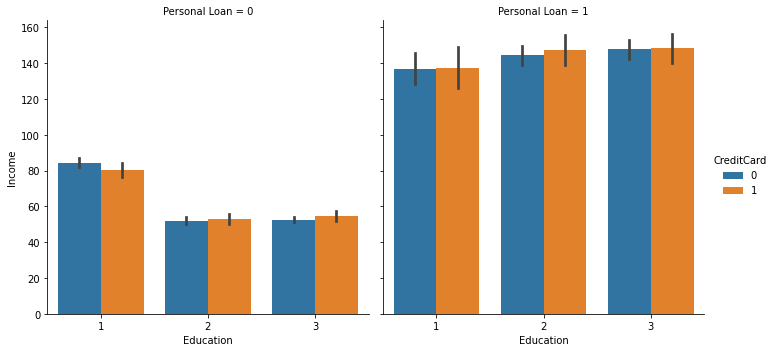

In [176]:
sns.catplot(y='Income', x='Education', kind='bar',col='Personal Loan' , hue='CreditCard',data=df_val)

**People with Higher Income and Higher Education seem to be ones who are more likely take the loan. Use of CreditCard does not seem to make a significant difference.**

In [177]:
pd.crosstab(df_val['Personal Loan'],df_val['CreditCard'])

CreditCard        0     1
Personal Loan            
0              3193  1327
1               337   143

Text(0.5, 1.0, 'Loan Vs Family Size')

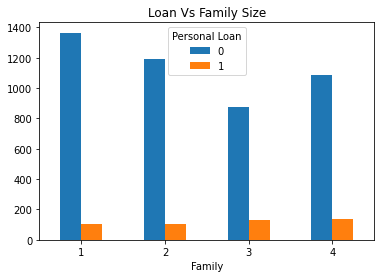

In [178]:
tab=pd.crosstab(df_val['Family'], df_val['Personal Loan'])
tab1=pd.crosstab(df_val['Online'], df_val['Personal Loan'])
tab.plot.bar()
plt.xticks(rotation=0)
plt.title("Loan Vs Family Size")

In [179]:
pd.crosstab(df_val['Family'], df_val['Personal Loan'], normalize='index')

Personal Loan         0         1
Family                           
1              0.927310  0.072690
2              0.918210  0.081790
3              0.868317  0.131683
4              0.890344  0.109656

**Bigger Families seem to have higher probability of taking the loan**

Family Size has an effect on customer propensity to take the Personal Loan as the p_value (0.0) < 0.05


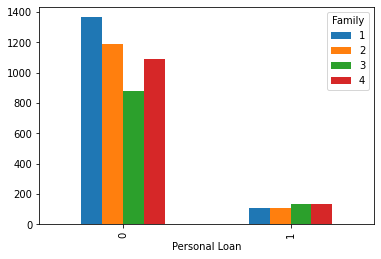

In [180]:
# Chi_square test to check if family size makes any difference to customers taking the loan
Ho = "Familiy Size has no effect on customer propensity to take the Personal Loan" 
Ha = "Family Size has an effect on customer propensity to take the Personal Loan"

crosstab = pd.crosstab(df_val['Personal Loan'],df_val['Family'])

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab.plot.bar()

Online banking activity has no effect on customer propensity to take the Personal Loan as the p_value (0.693) > 0.05


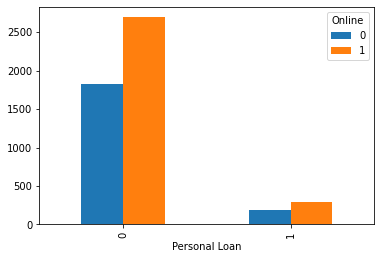

In [181]:
# Chi_square test to check if use of online banking facilities make any difference to customers taking the loan
Ho = "Online banking activity has no effect on customer propensity to take the Personal Loan" 
Ha = "Online banking activity has an effect on customer propensity to take the Personal Loan"

crosstab = pd.crosstab(df_val['Personal Loan'],df_val['Online'])

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab.plot.bar()

Online banking activity has no effect on customer propensity to take the Personal Loan as the p_value (0.693) > 0.05


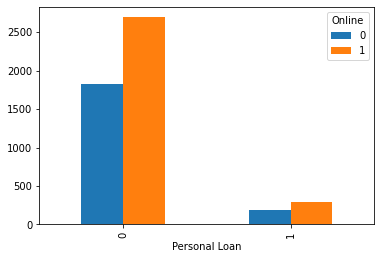

In [182]:
# Chi_square test to check if use of online banking facilities make any difference to customers taking the loan
Ho = "Online banking activity has no effect on customer propensity to take the Personal Loan" 
Ha = "Online banking activity has an effect on customer propensity to take the Personal Loan"

crosstab = pd.crosstab(df_val['Personal Loan'],df_val['Online'])

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:                                                                    # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab.plot.bar()

In [183]:
Temp=df_val[['Family','Education']]
Temp['Family']=Temp['Family'].astype('category')
Temp['Education']=Temp['Education'].astype('category')
Temp=pd.get_dummies(Temp,drop_first=True)
df_val=pd.concat([df_val,Temp], axis=1)

In [184]:
df_val.drop(['Family','Education'],axis=1 ,inplace=True)

In [185]:
df_val.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
CCAvg                 float64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
Family_2                uint8
Family_3                uint8
Family_4                uint8
Education_2             uint8
Education_3             uint8
dtype: object

In [ ]:
# Splitting of data to train and test
X=df_val.drop('Personal Loan', axis=1)
Y=df_val.loc[:,'Personal Loan']
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.3, random_state=1)  

In [ ]:
Logistic=LogisticRegression()
Logistic.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [186]:
Coeff=pd.DataFrame(Logistic.coef_).T
Coeff.index=X_train.columns
Coeff.loc['Intercept']=Logistic.intercept_
Coeff


0
ID                 -0.000109
Age                 0.025639
Experience         -0.027612
Income              0.028364
ZIP Code           -0.000072
CCAvg               0.286589
Mortgage            0.002350
Securities Account  0.018223
CD Account          0.158100
Online             -0.006468
CreditCard         -0.002355
Family_2           -0.139306
Family_3            0.152890
Family_4            0.120003
Education_2         0.185770
Education_3         0.191638
Intercept          -0.003596

Acc_Train_Log1 : 0.91
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3169
           1       0.55      0.34      0.42       331

    accuracy                           0.91      3500
   macro avg       0.74      0.65      0.68      3500
weighted avg       0.90      0.91      0.90      3500



Text(0.5, 15.0, 'Predicted')

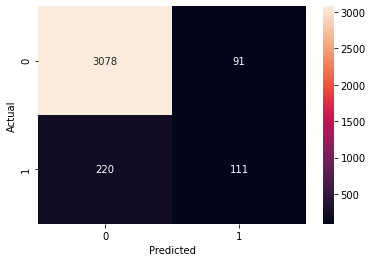

In [187]:
Acc_Train_Log1=accuracy_score(y_train, Logistic.predict(X_train))
CM_Log1=confusion_matrix(y_train,Logistic.predict(X_train))
print("Acc_Train_Log1 : %.2f" %Acc_Train_Log1)
print(classification_report(y_train,Logistic.predict(X_train)))
sns.heatmap(CM_Log1, annot=True, fmt='g')
plt.ylabel("Actual")
plt.xlabel("Predicted")

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1351
           1       0.52      0.32      0.39       149

    accuracy                           0.90      1500
   macro avg       0.72      0.64      0.67      1500
weighted avg       0.89      0.90      0.89      1500

Acc : 0.90


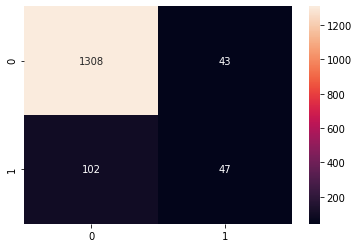

In [188]:
y_pred=Logistic.predict(X_test)
Acc_Test_Log1=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
print(classification_report(y_test, y_pred))
print("Acc : %.2f" %Acc_Test_Log1)
sns.heatmap(cm, annot=True, fmt='g')

AUC : 0.64


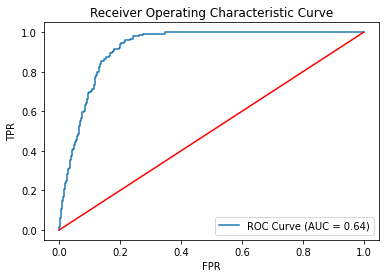

In [189]:
# Sensitivity for class 1 is only 60% which the modeller want to improve upon
Sensitivity_Log1=0.60
y_prob = Logistic.predict_proba(X_test)
AUC_Log1=roc_auc_score(y_test,y_pred)
print("AUC : %.2f" %AUC_Log1)
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
plt.plot(fpr, tpr, label="ROC Curve (AUC = %.2f)" %AUC_Log1)
plt.plot([0,1],[0,1],'r-')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc="lower right")

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1351
           1       0.46      0.55      0.50       149

    accuracy                           0.89      1500
   macro avg       0.71      0.74      0.72      1500
weighted avg       0.90      0.89      0.90      1500

AUC : 0.74
Acc :0.89


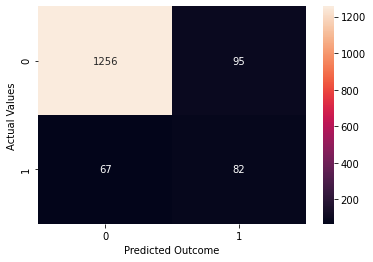

In [190]:
#tune the threshold level to improve sensitivity (recall)
y_flag=y_prob[:,1]>0.25
Acc_Test_Log2=accuracy_score(y_test,y_flag)
cm=confusion_matrix(y_test,y_flag)
print(classification_report(y_test, y_flag))
sns.heatmap(cm, annot=True, fmt='g')
AUC_Log2=roc_auc_score(y_test,y_flag)
print("AUC : %.2f" %AUC_Log2)
print("Acc :%.2f" %Acc_Test_Log2)
plt.xlabel("Predicted Outcome")
plt.ylabel("Actual Values")
Sensitivity_Log2=0.76

**In this case study we would love to have the sensitivity (i.e. True Positive or Recall) as high as possible and the false negatives as low as possible. By reducing the threshold to 25% we have a much higher recall as well as a higher AUC. If we further decrease the threshold to less than 25, we get better sensitivity but at the cost of higher false negatives. Hence for a balanced and stable outcome, I chose the threshold of 25%.**

In [191]:
# Try logistic using statsmodel package
import statsmodels.api as sm

In [192]:
Logreg=sm.Logit(y_train, sm.add_constant(X_train.astype(float))).fit()
print(Logreg.summary())

Optimization terminated successfully.
         Current function value: 0.107435
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3483
Method:                           MLE   Df Model:                           16
Date:                Sat, 05 Sep 2020   Pseudo R-squ.:                  0.6567
Time:                        14:41:45   Log-Likelihood:                -376.02
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                7.124e-297
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -12.5117      5.495     -2.277      0.023     -23.283      -1.741
ID  

Text(0.5, 1.0, 'Distribution of Predictions')

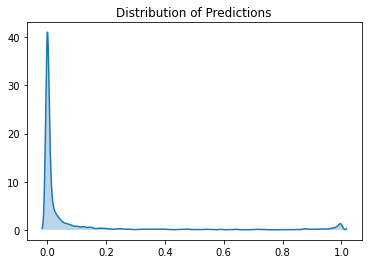

In [193]:
#Examine distribution of prediction
kde_res=sm.nonparametric.KDEUnivariate(Logreg.predict())
kde_res.fit()
plt.plot(kde_res.support, kde_res.density)
plt.fill_between(kde_res.support, kde_res.density, alpha=0.3)
plt.title("Distribution of Predictions")

**Density is highest near 0 which means a lot of customers did not respond to the campaign**

In [194]:
y_prob=Logreg.predict(sm.add_constant(X_test.astype(float)))

In [195]:
y_pred=y_prob>0.25 #inference taken from previous iteration
confusion_matrix(y_test,y_pred)

array([[1314,   37],
       [  35,  114]])

In [196]:
print(classification_report(y_test, y_pred))
Sensitivity_Log3=114/(35+114)
print(Sensitivity_Log3)


              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1351
           1       0.75      0.77      0.76       149

    accuracy                           0.95      1500
   macro avg       0.86      0.87      0.87      1500
weighted avg       0.95      0.95      0.95      1500

0.7651006711409396


In [197]:
Coeff=pd.DataFrame(Logreg.params, columns=['Coeff'])
Coeff['Odds']=np.exp(Coeff.Coeff)
Coeff['Prob']=Coeff['Odds']/(Coeff.Odds+1)
Coeff.sort_values(by='Odds', ascending=False)
Coeff['pval']=round(Logreg.pvalues,5)
Coeff[Coeff.pval<0.05]

Coeff       Odds      Prob     pval
const              -12.511684   0.000004  0.000004  0.02280
Income               0.062734   1.064744  0.515678  0.00000
CCAvg                0.245921   1.278798  0.561172  0.00002
Securities Account  -1.076625   0.340744  0.254145  0.00785
CD Account           3.714164  41.024293  0.976204  0.00000
Online              -0.582192   0.558673  0.358428  0.00478
CreditCard          -0.989802   0.371650  0.270951  0.00025
Family_3             2.500197  12.184891  0.924156  0.00000
Family_4             1.635437   5.131702  0.836913  0.00000
Education_2          4.013593  55.345367  0.982252  0.00000
Education_3          4.291848  73.101403  0.986505  0.00000

0.952

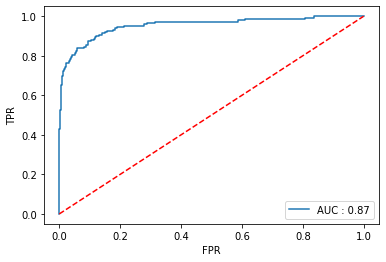

In [198]:
AUC_Log3=roc_auc_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='AUC : %.2f'%AUC_Log3)
plt.legend(loc='lower right')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot([0,1],[0,1],'r--')
Acc_Log3=accuracy_score(y_test,y_pred)
Acc_Log3

# **Decision tree classification**

In [199]:
from sklearn.metrics import classification_report, accuracy_score, precision_score,recall_score,plot_confusion_matrix,plot_roc_curve,plot_precision_recall_curve
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)

Training Accuracy: 1.0
Testing Accuracy: 0.98
Precision: 0.91
Recall: 0.91


Text(0.5, 1.0, 'Precision-Recall Decision Tree Classifier')

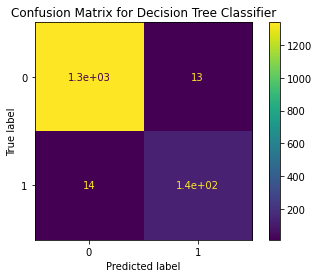

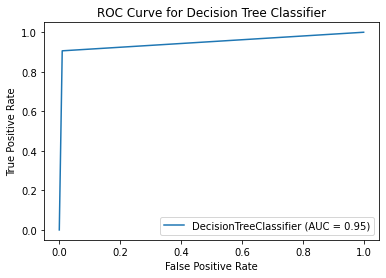

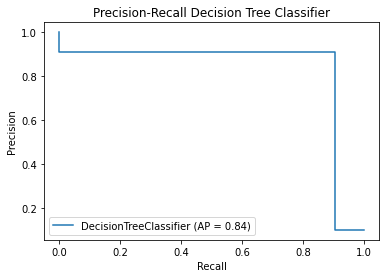

In [200]:
train_score = dtc.score(X_train,y_train)
print('Training Accuracy:', train_score.round(2))
test_score = dtc.score(X_test,y_test)
print('Testing Accuracy:', test_score.round(2))

precision_dt = precision_score(y_test, y_pred ).round(2)  
print('Precision:', precision_dt)
recall_dt = recall_score(y_test, y_pred).round(2)
print('Recall:', recall_dt)

plot_confusion_matrix(dtc,X_test,y_test)
plt.title('Confusion Matrix for Decision Tree Classifier')

plot_roc_curve(dtc,X_test,y_test)
plt.title('ROC Curve for Decision Tree Classifier')

plot_precision_recall_curve(dtc,X_test,y_test)
plt.title('Precision-Recall Decision Tree Classifier')

**Try K-Nearest neighbour classifier to fit a model**

In [224]:
knn=KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

*precision and recall for the class 1 is very poor for the above model. If the model predicts only 33% of the potential customers who may take the accurately, it's not going to be very helpful to the company.*

In [225]:
List=list(np.arange(1,20))
neigbors=list(filter(lambda x: x%2!=0,List))
Accuracy=[]
AUC_KNN=[]

In [226]:
for n in neigbors:
    knn=KNeighborsClassifier(n_neighbors=n, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred=knn.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    Accuracy.append(acc)
    y_prob=knn.predict_proba(X_test)
    AUC=roc_auc_score(y_test,y_prob[:,1])
    AUC_KNN.append(AUC)

MissClassification=[1-x for x in Accuracy]
MissClassification.index(min(MissClassification))
print("Based on misclassification compariosn, optimal n: %i" %neigbors[MissClassification.index(min(MissClassification))])
print("Based on AUC compariosn, optimal n: %i" %neigbors[AUC_KNN.index(max(AUC_KNN))])

Based on misclassification compariosn, optimal n: 5
Based on AUC compariosn, optimal n: 9


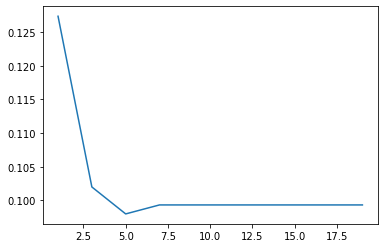

In [227]:
plt.plot(neigbors,MissClassification)

Acc_KNN:0.90


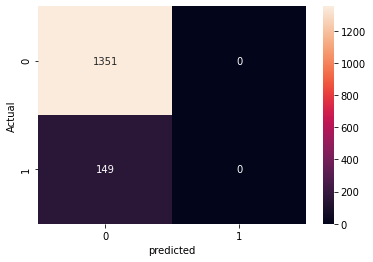

In [206]:
#Final KNN model
KNN=KNeighborsClassifier(n_neighbors=17, metric='euclidean')
KNN.fit(X_train, y_train)
y_pred=KNN.predict(X_test)
Acc_KNN=accuracy_score(y_test,y_pred)
print("Acc_KNN:%.2f"%Acc_KNN)
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt="g")
plt.ylabel("Actual")
plt.xlabel("predicted")
Sensitivity_KNN=42/(107+42)

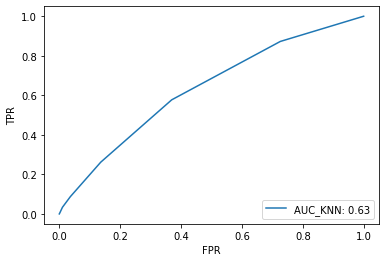

In [207]:
y_prob=KNN.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
AUC_KNN=roc_auc_score(y_test, y_prob)
plt.plot(fpr,tpr, label="AUC_KNN: %.2f" %AUC_KNN)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc="lower right")

In [208]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1351
           1       0.00      0.00      0.00       149

    accuracy                           0.90      1500
   macro avg       0.45      0.50      0.47      1500
weighted avg       0.81      0.90      0.85      1500



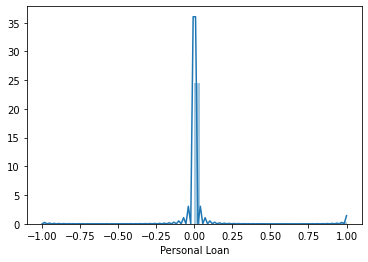

In [209]:
sns.distplot((y_test-y_predict),bins = 50)

*Quite a few misclassifications for 1. This may not be the best model for predicting potential customers for the personal loan.*

**Try Naive bayes**

In [210]:
NBC=GaussianNB()
NBC.fit(X_train, y_train)
y_pred=NBC.predict(X_test)

In [211]:
Acc_NB=accuracy_score(y_test, y_pred)
print("Accuracy : %.2f" %Acc_NB)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy : 0.88
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1351
           1       0.41      0.56      0.47       149

    accuracy                           0.88      1500
   macro avg       0.68      0.73      0.70      1500
weighted avg       0.90      0.88      0.89      1500

[[1233  118]
 [  66   83]]


*Poor precision and recall for the minority class 1. Poor predicatability means inability to identify potential cutomers*

In [212]:
Sensitivity_NB=85/(64+85)

In [213]:
NBC.predict_proba(X_test)

array([[9.95016358e-01, 4.98364240e-03],
       [9.99901379e-01, 9.86211900e-05],
       [9.99968560e-01, 3.14403869e-05],
       ...,
       [9.99997928e-01, 2.07201712e-06],
       [9.99975360e-01, 2.46402738e-05],
       [9.99978233e-01, 2.17670481e-05]])

In [214]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2 Score', metrics.r2_score(y_test,y_pred))

Mean Absolute Error:  0.12266666666666666
Root Mean Squared Error 0.35023801430836526
R2 Score -0.3710947396658699


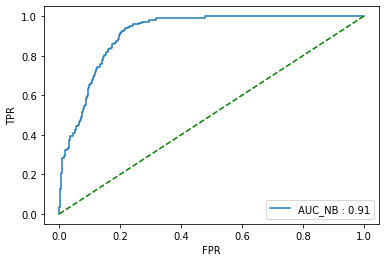

In [215]:
AUC_NB=roc_auc_score(y_test, NBC.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, NBC.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label ="AUC_NB : %.2f"%AUC_NB)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc="lower right")
plt.plot([0,1],[0,1], 'g--')

In [216]:
k= KNeighborsClassifier(n_neighbors= 15,weights ='uniform',metric='euclidean')
k.fit(X_test,y_test)
y_pred=k.predict(X_test)

**Try Support Vector Machine**

In [217]:
from sklearn.svm import SVC
Clf=SVC(kernel='poly', degree=2)
Clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [218]:
y_pred=Clf.predict(X_test)
Acc_SVM=accuracy_score(y_test, y_pred)
print("Acc_SVM :%.2f" %Acc_SVM)
print(classification_report(y_test,y_pred))

Acc_SVM :0.90
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1351
           1       0.00      0.00      0.00       149

    accuracy                           0.90      1500
   macro avg       0.45      0.50      0.47      1500
weighted avg       0.81      0.90      0.85      1500



In [219]:
Comparison={'Accuracy':[Acc_Test_Log1, Acc_Test_Log2, Acc_Log3, Acc_KNN, Acc_NB, 0.97],
           'Area Under Curve':[AUC_Log1, AUC_Log2, AUC_Log3, AUC_KNN, AUC_NB, 'Not calculated as it took too much time'],
           'Sensitivity': [Sensitivity_Log1, Sensitivity_Log2, Sensitivity_Log3, Sensitivity_KNN, Sensitivity_NB, 0.77]}
Comparison = pd.DataFrame(Comparison, index=['LogisticVariant1','LogisticVariant2', 'LogisticVariant3','KNN','NaiveBayes', 'SVM_Poly_Kernel'])
Comparison

Accuracy  ... Sensitivity
LogisticVariant1  0.903333  ...    0.600000
LogisticVariant2  0.892000  ...    0.760000
LogisticVariant3  0.952000  ...    0.765101
KNN               0.900667  ...    0.281879
NaiveBayes        0.877333  ...    0.570470
SVM_Poly_Kernel   0.970000  ...    0.770000

[6 rows x 3 columns]

Text(0.5, 1.0, 'Evaluation Metrics Comparison')

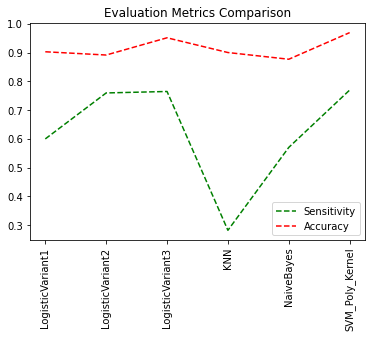

In [220]:
plt.plot(Comparison.index,Comparison.Sensitivity, 'g--', label='Sensitivity')
plt.plot(Comparison.index,Comparison.Accuracy, 'r--', label='Accuracy')
plt.xticks(rotation=90)
plt.legend(loc='lower right')
plt.title("Evaluation Metrics Comparison")

In [221]:
### Decision tree gives the best result for both class 0 and class 1
### Given the decision tree gives best result, let us try ensemble of trees 

y_train = np.ravel(y_train)   # converting y_train vector to single dimensional array
rfcl = RandomForestClassifier(random_state=1)

bgcl = BaggingClassifier(n_estimators=20)  #the base_estimator can be null.
#The bagging classifer  will build it's own tree

enclf = VotingClassifier(estimators = [('rf', rfcl), ('bg', bgcl)], voting = 'hard')

for clf, label in zip([rfcl, enclf, bgcl], ['RandomForest', 'Ensemble', 'Bagging']):
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1351
           1       0.98      0.85      0.91       149

    accuracy                           0.98      1500
   macro avg       0.98      0.93      0.95      1500
weighted avg       0.98      0.98      0.98      1500

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1351
           1       0.98      0.84      0.91       149

    accuracy                           0.98      1500
   macro avg       0.98      0.92      0.95      1500
weighted avg       0.98      0.98      0.98      1500

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1351
           1       0.94      0.87      0.91       149

    accuracy                           0.98      1500
   macro avg       0.96      0.93      0.95      1500
weighted avg       0.98      0.98      0.98      1500



*In this project, the major gain for the company would be if the model accurately predicts the liability customers who can be converted to personal loan customers. Since the distribution of the target variable is highly skewed in favor of the minority class (i.e. customers who did not turn into personal loan customer in the previous campaign), accuracy as a metric can be very misleading. Hence a more apt mode of comparison of models tried would be AUC and/or Sensitivity (for Class 1). Logistic Regression Variant 2 and 3 have comaparatively higher AUCs and Sensitivity. The SVM model tried with polynomial kernel gave best Sensitivity and highest accuracy score. It may have given better AUC also considering the combination of highest accuracy and highest sensitivity. I could not get it because probability calculation was too much time to be processed. In the absence of SVM results, I would choose Logistic Regression variant 2 or 3 as my final model. The additional advantage with it is that, we get to know the co-efficients of each variable which gives high degree of interpretability of the model used. We can know, for each unit change in the independent variable, what is the shift in the probability of the customer becoming personal customer. We get the odds ratio of all independent variables.*

After comparing all the above models we get that,

**FOR LOGISTIC REGRESSION MODEL:**
* Accuracy score on test data is 94.93%.
* Accuracy score on train data is 94.94%.
* Recall Score : 0.6180555555555556
* Precision Score : 0.8090909090909091 
* f1 score : 0.7007874015748031
*  Precision Score : 0.8090909090909091
*  ROC AUC score : 0.8012844149459194


**FOR DECISION TREE MODEL:**

Accuracy score on test data is 97.86%.

Accuracy score on train data is 99.60%.

Recall score : 0.875

Precision score : 0.9

f1 score : 0.8873239436619719

ROC AUC score : 0.9323377581120944*

**FOR RANDOM FOREST MODEL:**

Accuracy score on test data is 99.86%.

Accuracy score on train data is 99.48%.

Recall score : 0.8888888888888888

Precision score : 0.9

f1 score : 0.8873239436619719

ROC AUC score : 0.9323377581120944

.



**Atlast, Thank you to InternshipStdio who helped me to learn a lot about Machine Learning. I would like to thanks all mentor who helped during 1 months of internship and helps me to explore the ML concept from basic to Advance. Thanks a lot Looking Forward to again be a part of the InternshipStdio and National Engineering Olympiad Foundation**

*SHIVANT KUMAR PANDEY*



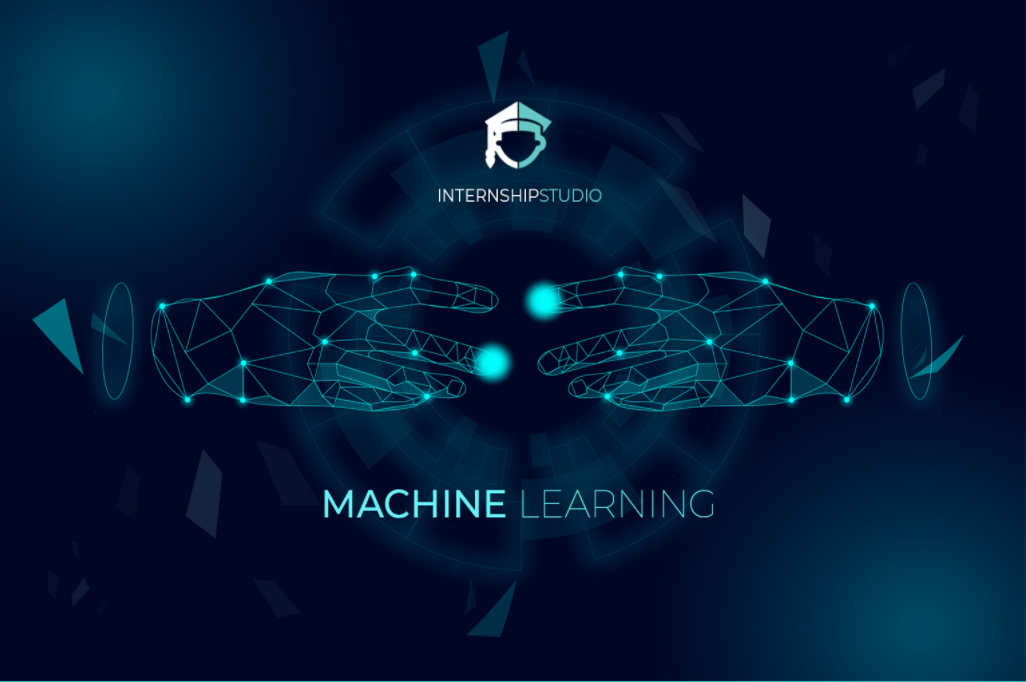